In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip /content/btd2.zip

Archive:  /content/btd2.zip
   creating: btd2/brain_tumor_dataset/
   creating: btd2/brain_tumor_dataset/no/
  inflating: btd2/brain_tumor_dataset/no/no0.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1.jpg  
  inflating: btd2/brain_tumor_dataset/no/no10.jpg  
  inflating: btd2/brain_tumor_dataset/no/no100.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1000.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1001.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1002.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1003.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1004.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1005.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1006.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1007.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1008.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1009.jpg  
  inflating: btd2/brain_tumor_dataset/no/no101.jpg  
  inflating: btd2/brain_tumor_dataset/no/no1010.jpg  
  inflating: btd2/brain_tumor_dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
#count the number of images in the classes
# yes - presence of brain tumor
# no - absense of brain tumor

ROOT_DIR = "/content/btd2/brain_tumor_dataset"
number_of_images  = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('yes', 1500), ('no', 1500)])

#we will now split the data for our cnn model 
- 70% for training 
- 15% for validation
- 15% for testing

In [6]:
#here we will create a training folder 

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(70/100*number_of_images[dir])-5),
                                replace = False):
      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Folder exists!!")

Folder exists!!


In [7]:
def dataFolder(p, split):
  # we create a train folder

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print( f"{p}Folder exists!!")

In [8]:
dataFolder("train", 0.7) # 70% of total images contains in this folder for training model

trainFolder exists!!


In [9]:
dataFolder("Validation", 0.15) # 15% of total images contains in this model for validations


In [10]:
dataFolder("test", 0.15) # 15% of total images contains in this model for testing

In [12]:
# code to check how many number of images left, after splitting the images in above three folder
number_of_images  = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('yes', 15), ('no', 15)])

#BUILDING A MODEL

In [13]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [15]:
# we will build our CNN MODEL 

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size= (3, 3), activation = 'relu', input_shape = (224, 224, 3) ))

model.add(Conv2D(filters = 36, kernel_size= (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size= (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units= 64, activation='relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 36)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)      

In [16]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

#We will now prepare the data using ImageDataGenerator module


In [18]:
def preprocessingImages1(path):
  
  """
  input : path
  output : pre processed images

  """
  
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size= 32, class_mode= 'binary')

  return image




In [19]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 2090 images belonging to 2 classes.


In [20]:
def preprocessingImages2(path):
  
  """
  input : path
  output : pre processed images

  """
  
  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size= 32, class_mode= 'binary')

  return image




In [21]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [22]:
path = "/content/Validation"
val_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [65]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early-stopping 

es = EarlyStopping(monitor="accuracy", min_delta = 0.01, patience = 3, verbose= 1, mode='auto')

# model checkpoint 

mc = ModelCheckpoint(monitor="accuracy", filepath= "./trained_model.h5", verbose= 1, save_best_only = True,  mode='auto')


cd = [es, mc]

#MODEL TRAINING 


In [66]:
hs = model.fit_generator(generator = train_data,  
                         steps_per_epoch= 8, 
                         epochs =300, 
                         verbose = 1,
                         validation_data = val_data , 
                         validation_steps = 16,   
                         callbacks = cd)
                        
                  

Epoch 1/300
8/8 [==============================] - ETA: 0s - loss: 0.4381 - accuracy: 0.7930


Epoch 1: accuracy improved from -inf to 0.79297, saving model to ./trained_model.h5
8/8 [==============================] - 6s 806ms/step - loss: 0.4381 - accuracy: 0.7930 - val_loss: 0.4848 - val_accuracy: 0.7636
Epoch 2/300
8/8 [==============================] - ETA: 0s - loss: 0.4331 - accuracy: 0.7778
Epoch 2: accuracy did not improve from 0.79297
8/8 [==============================] - 3s 392ms/step - loss: 0.4331 - accuracy: 0.7778
Epoch 3/300
8/8 [==============================] - ETA: 0s - loss: 0.3793 - accuracy: 0.8555
Epoch 3: accuracy improved from 0.79297 to 0.85547, saving model to ./trained_model.h5
8/8 [==============================] - 3s 409ms/step - loss: 0.3793 - accuracy: 0.8555
Epoch 4/300
8/8 [==============================] - ETA: 0s - loss: 0.4371 - accuracy: 0.7969
Epoch 4: accuracy did not improve from 0.85547
8/8 [==============================] - 3s 380ms/step - loss: 0.4371 - accuracy: 0.7969
Epoch 5/300
8/8 [==============================] - ETA: 0s - loss

In [67]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

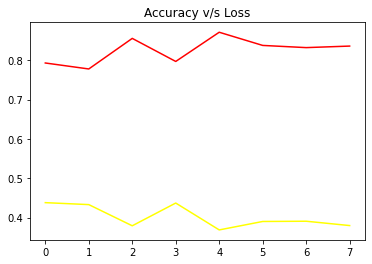

In [68]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'], c = "red") # accuracy of model = RED (we should get max accuracy )
plt.plot(h['loss'], c = "yellow") # loss of data in model = YELLOW (loss should be minimum)

plt.title("Accuracy v/s Loss")
plt.show()

#testing our model for some images that are not preprocessed!!


In [69]:
from keras.preprocessing.image import load_img, img_to_array

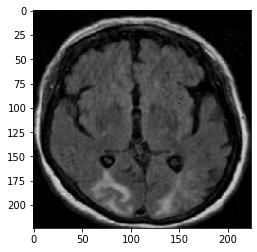

0.3022548

In [76]:
path = "/content/test/no/no537.jpg"

img = load_img(path, target_size = (224, 224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis= 0 )

pred = model.predict(input_arr)[0][0]
pred








In [59]:
train_data.class_indices

{'no': 0, 'yes': 1}